In [ ]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt

# Define the relative path to the hamageolib package
root_path = os.path.join(Path().resolve().parent.parent.parent)
package_path = os.path.join(root_path, "hamageolib")

if str(root_path) not in sys.path:
    sys.path.insert(0, str(root_path))

from hamageolib.research.haoyuan_2d_subduction.legacy_tools import SlabTemperature

/home/lochy/ASPECT_PROJECT/HaMaGeoLib/hamageolib


## Apply offsets to slab surface to get mantle wedge profiles

## Run test case with profile offsets

Below we run a test and plot the results

In [2]:
case_path = os.path.join(root_path, "big_tests", "TwoDSubduction", 'EBA_CDPT_test_perplex_mixing_log')

# Check if the folder exists and contains test files
if not os.path.exists(case_path) or not os.listdir(case_path):
    raise FileExistsError("Skipping test: big test contents not found in 'big_tests/'.")

# Make output directory and clear old files
o_dir = os.path.join(root_path, "dtemp", "TwoDSubduction_vtk_pp")
if not os.path.isdir(o_dir):
    os.mkdir(o_dir)
o_file = os.path.join(o_dir, "slab_temperature_00104.txt")
if os.path.isfile(o_file):
    os.remove(o_file)

vtu_snapshot = 104 # 0 Ma
_, _, _ = SlabTemperature(case_path, vtu_snapshot, o_file, output_slab=True, fix_shallow=True, offsets=[-5e3, -10e3])
assert(os.path.isfile(o_file))  # assert the outputs of temperature profiles

SlabTemperature: Start
ReadFile started


/home/lochy/ASPECT_PROJECT/HaMaGeoLib/hamageolib/research/haoyuan_2d_subduction/legacy_tools.py:465: UserWarning: Interpret: step 0 is not found
  warnings.warn("%s: step %d is not found" % (func_name(), step))


	ReadFile: /home/lochy/ASPECT_PROJECT/HaMaGeoLib/big_tests/TwoDSubduction/EBA_CDPT_test_perplex_mixing_log/output/solution/solution-00104.pvtu
	ReadFile, takes 0.28 s
ConstructPolyData started
	ConstructPolyData: 463527 * (2 + 6) entries in the polydata imported and 206012 * (2 + 6) points in the data at cell center. import data takes 0.000040, interpolate cell center data takes 0.624754
	Construct polydata, takes 0.62 s
ExportPolyData: Write file /home/lochy/ASPECT_PROJECT/HaMaGeoLib/big_tests/TwoDSubduction/EBA_CDPT_test_perplex_mixing_log/vtk_outputs/processed-00104.vtp
ExportPolyData: Write file /home/lochy/ASPECT_PROJECT/HaMaGeoLib/big_tests/TwoDSubduction/EBA_CDPT_test_perplex_mixing_log/vtk_outputs/processed_center-00104.vtp
ExportPolyData: Write file /home/lochy/ASPECT_PROJECT/HaMaGeoLib/big_tests/TwoDSubduction/EBA_CDPT_test_perplex_mixing_log/vtk_outputs/slab_env0_00100.vtp
ExportPolyData: Write file /home/lochy/ASPECT_PROJECT/HaMaGeoLib/big_tests/TwoDSubduction/EBA_CDPT_test

In [ ]:
from hamageolib.utils.file_reader import read_aspect_header_file

pd_data = read_aspect_header_file(o_file)

Figure on the left shows the points on different profiles. Here we apply offset of 5 km, 10 km, respectively to the slab surface. Figure on the right is the related T profiles

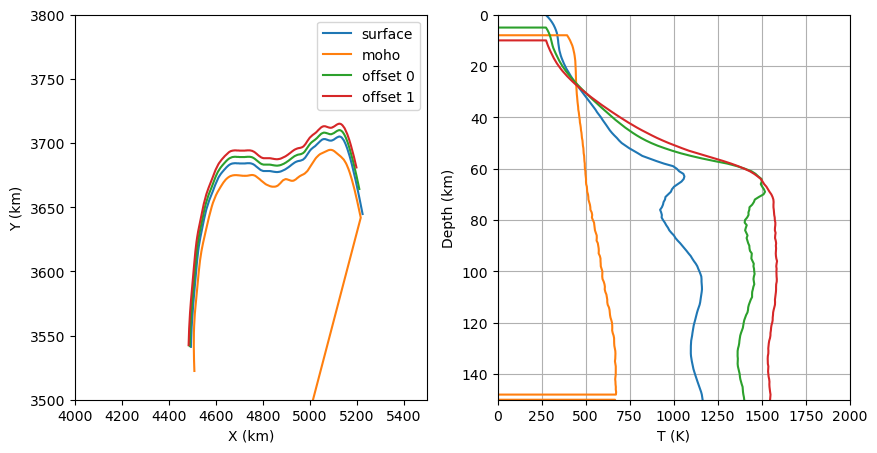

In [6]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(5*2, 5))
gs = GridSpec(1, 2)

# create mask for offset data
mask_mh = (pd_data['x bot']**2.0 + pd_data['y bot']**2.0 < 6371e3**2.0)
mask0 = (pd_data['x offset 0']**2.0 + pd_data['y offset 0']**2.0 < 6371e3**2.0)
mask1 = (pd_data['x offset 1']**2.0 + pd_data['y offset 1']**2.0 < 6371e3**2.0)

# 1: plot the coordinates
ax = fig.add_subplot(gs[0, 0])

ax.plot(pd_data['x']/1e3, pd_data['y']/1e3, label="surface")
ax.plot(pd_data['x bot'][mask_mh]/1e3, pd_data['y bot'][mask_mh]/1e3, label="moho")
ax.plot(pd_data['x offset 0'][mask0]/1e3, pd_data['y offset 0'][mask0]/1e3, label="offset 0")
ax.plot(pd_data['x offset 1'][mask1]/1e3, pd_data['y offset 1'][mask1]/1e3, label="offset 1")

ax.set_xlim([4000.0, 5500.0])
ax.set_ylim([3500.0, 3800.0])

ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.legend()

# 1: plot the temperatures
ax = fig.add_subplot(gs[0, 1])

ax.plot(pd_data["Ttop"], pd_data["depth"]/1e3)
ax.plot(pd_data["Tbot"], pd_data["depth"]/1e3)
ax.plot(pd_data["Toffset 0"], pd_data["depth"]/1e3)
ax.plot(pd_data["Toffset 1"], pd_data["depth"]/1e3)

ax.set_xlim([0, 2000])
ax.set_ylim([0, 150])

ax.invert_yaxis()

ax.set_xlabel("T (K)")
ax.set_ylabel("Depth (km)")

ax.grid()